# How to Develop a CNN From Scratch for CIFAR-10 Photo Classification

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane<br>
1: automobile<br>
2: bird<br>
3: cat<br>
4: deer<br>
5: dog<br>
6: frog<br>
7: horse<br>
8: ship<br>
9: truck<br>

## Step 1: Import the necessary libraries

We will use Keras, a high-level deep learning library, to implement our CNN. We'll also use some other Python libraries to help us with data preprocessing and visualization.

In [16]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


## Step 2: Load the CIFAR-10 dataset

We will be using the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Step 3: Preprocess the data

We need to preprocess the data before we can use it to train our CNN. First, we'll normalize the pixel values to be between 0 and 1. Then, we'll one-hot encode the class labels.

In [18]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Step 4: Define the CNN architecture

We'll define our CNN architecture using the Sequential model in Keras. Our CNN will have the following layers:

- Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation function
- Max pooling layer with 2x2 pool size
- Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation function
- Max pooling layer with 2x2 pool size
- Flatten layer to convert the output of the convolutional layers into a 1D feature vector
- Fully connected layer with 512 units and ReLU activation function
- Output layer with 10 units and softmax activation function

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


## Step 5: Compile the model

Before we can train the model, we need to compile it. We'll use categorical cross-entropy as our loss function, Adam as our optimizer, and accuracy as our evaluation metric.

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 6: Train the model

We'll train the model using the fit() method in Keras. We'll pass in our preprocessed training data X_train and y_train, specify a batch size of 32, train for 50 epochs, and use our preprocessed test data X_test and y_test as validation data.

The fit() method returns a History object which we'll store in the history variable. This object contains information about the training and validation accuracy and loss for each epoch.

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3469 - accuracy: 0.5200 - val_loss: 1.0881 - val_accuracy: 0.6243
Epoch 2/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9690 - accuracy: 0.6613 - val_loss: 0.9905 - val_accuracy: 0.6564
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7890 - accuracy: 0.7257 - val_loss: 0.9250 - val_accuracy: 0.6829
Epoch 4/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6418 - accuracy: 0.7768 - val_loss: 0.8731 - val_accuracy: 0.7043
Epoch 5/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5037 - accuracy: 0.8246 - val_loss: 0.8866 - val_accuracy: 0.7185
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3746 - accuracy: 0.8711 - val_loss: 0.9713 - val_accuracy: 0.7067
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.2718 - accuracy: 0.9071 - val_loss: 1.1253 -

## Step 7: Evaluate the model

After training our CNN, we'll evaluate its performance on the test set using the evaluate() method in Keras. We'll print out the test loss and accuracy.

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 3.7683 - accuracy: 0.7034
Test loss: 3.7682883739471436
Test accuracy: 0.7034000158309937


## Step 8: Visualize the training history

We can visualize the training and validation accuracy and loss over the epochs using the history object.

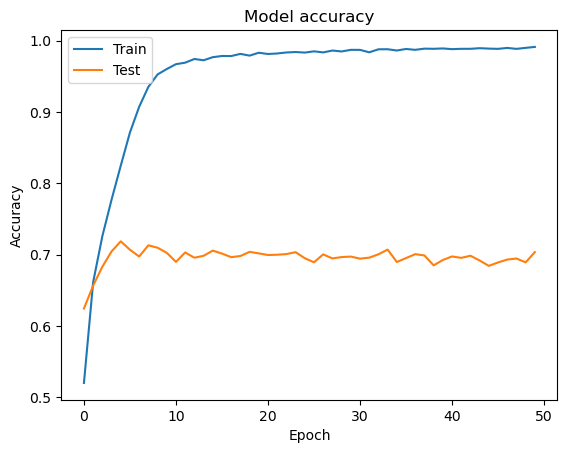

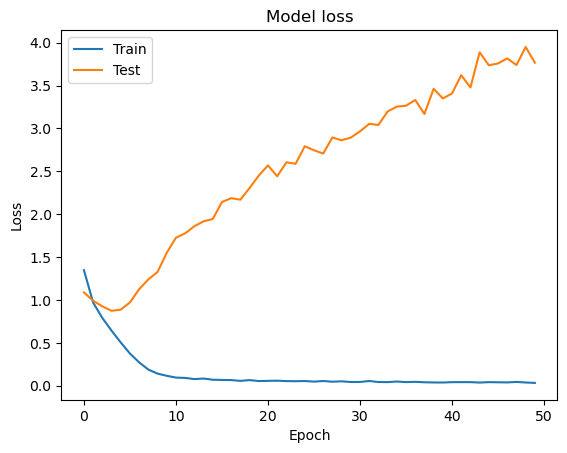

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


These plots show us how the accuracy and loss change over the epochs for the training and validation sets. If the training accuracy is much higher than the validation accuracy, it could be a sign of overfitting.

And that's it! You've successfully built and trained a CNN from scratch for CIFAR-10 photo classification.